In [41]:
from ampl import parse_ampl_table
from io import StringIO

with open("../out/z2-a-out.dat") as file:
    z2_a_df = parse_ampl_table(file)

z2_a_df

,out_risk,out_profit_average
0,0.0,-300.0
15,14.998,229.819
30,30.0195,691.626
45,44.9187,1109.61
60,60.0504,1533.73
75,75.0219,1953.56
90,89.9629,2373.05
105,104.932,2792.86
120,119.763,3209.0
135,134.952,3634.97


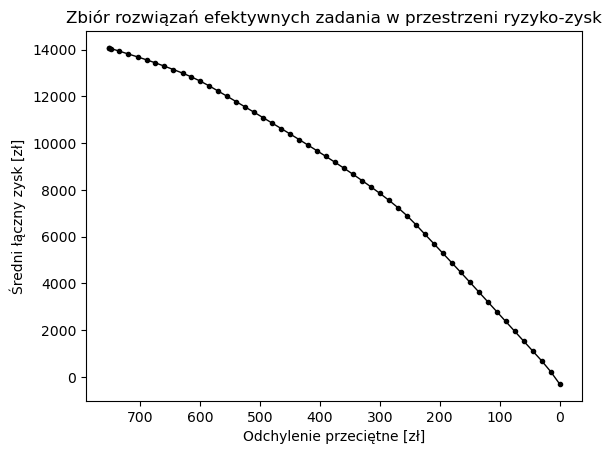

In [24]:
import numpy as np
from matplotlib import pyplot as plt


ax = plt.subplot(1, 1, 1)
ax.plot(z2_a_df["out_risk"], z2_a_df["out_profit_average"], "ko-", linewidth=1, markersize=3)
ax.invert_xaxis()
plt.title("Zbiór rozwiązań efektywnych zadania w przestrzeni ryzyko-zysk")
plt.xlabel("Odchylenie przeciętne [zł]")
plt.ylabel("Średni łączny zysk [zł]")
plt.savefig("../out/z2-a-plot.png")
plt.show()

In [25]:
from ampl import parse_ampl_set, parse_ampl_table

with open("../out/z2-c-out.dat") as file:
    z2_c_risks_max = parse_ampl_set(file)
    display(z2_c_risks_max)

    z2_c_dfs = [parse_ampl_table(file, names={1: "risk"}) for _ in z2_c_risks_max]
    display(z2_c_dfs[0].head())

0    100
1    400
2    600
Name: in_a_risk, dtype: int64

,profit,risk
1,2578.27,76.7137
2,2738.91,83.9291
3,2426.03,228.95
4,2769.33,114.352
5,2840.4,185.418


In [46]:
import pandas as pd

data = np.array([df["profit"] for df in z2_c_dfs])
data = np.sort(data, 1)
n_scenarios = data.shape[1]
headers = [f"{(i+1)/n_scenarios:.2f}" for i in range(n_scenarios)]
index = pd.Index(z2_c_risks_max, name="a_risk")
profits_sorted = pd.DataFrame(data, columns=headers, index=index)
profits_sorted["R"] = np.array(range(len(data))) + 1
profits_sorted = profits_sorted.set_index("R", append=True)
profits_sorted

import numpy as np
with np.printoptions(precision=2, suppress=True):
    print(profits_sorted.T.round(2).values[:6])
    print(profits_sorted.T.round(2).values[-6:])

[[2246.26 7904.41 10159.3]
 [2247.94 7928.13 10203.0]
 [2266.48 8058.3 10280.3]
 [2269.86 8061.1 10313.1]
 [2289.78 8079.48 10375.5]
 [2298.24 8092.72 10441.8]]
[[3052.7 11078.6 14975.6]
 [3058.01 11137.9 15000.1]
 [3070.03 11210.5 15167.0]
 [3070.12 11240.9 15279.7]
 [3077.59 11479.9 15386.3]
 [3097.9 11484.4 15412.4]]


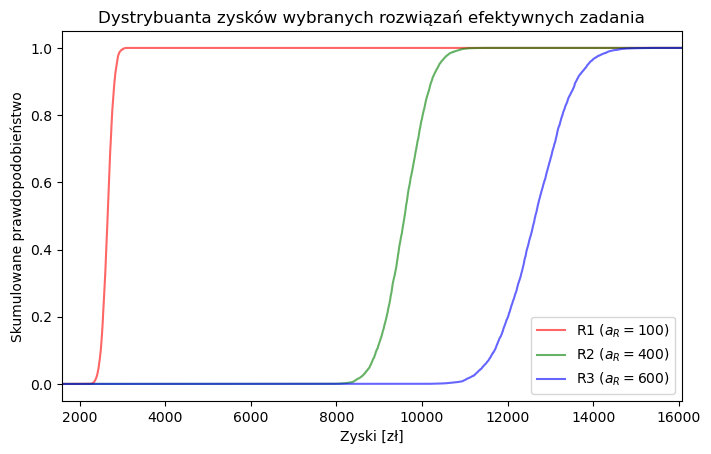

In [40]:
profit_max = profits_sorted.values[:, -1].max()
profit_min = profits_sorted.values[:, 0].min()
margin = (profit_max - profit_min) * 0.05
plt.figure(figsize=(8, 4.8))

for (key, row), color in zip(profits_sorted.iterrows(), "rgb"):
    label = f"R{key[1]} ($a_R = {key[0]}$)"
    
    # lines
    xs = np.array([profit_min - margin, *row.values, profit_max + margin])
    ys = np.array([*range(n_scenarios + 1)] + [n_scenarios]) / n_scenarios
    plt.plot(xs, ys, color=color, label=label, alpha=0.6)

    # # start points
    # filter = [True] + [x1 != x2 for x1, x2 in zip(xs[1:-2], xs[2:-1])]
    # style={"s": 3, "facecolors":"white", "edgecolors": color, "alpha": 0.6}
    # plt.scatter(xs[1:-1][filter], ys[:-1][filter], **style)

    # # end points
    # filter = [x1 != x2 for x1, x2 in zip(xs[1:-2], xs[2:-1])] + [True]
    # style={"s": 3, "c": color, "alpha": 0.6}
    # plt.scatter(xs[1:-1][filter], ys[1:][filter], **style)

plt.title("Dystrybuanta zysków wybranych rozwiązań efektywnych zadania")
plt.xlabel("Zyski [zł]")
plt.ylabel("Skumulowane prawdopodobieństwo")
plt.legend(loc="lower right")
plt.xlim((profit_min - margin, profit_max + margin))
plt.savefig("../out/z2-c-plot.png")
plt.show()